In [54]:
source('./data_processing.R')

In [55]:
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# CROP-seq_CRISPRi_10x Lane_1

In [56]:
input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample1/'
output_dir = './figures_results/Tian_NatureNeuroscience/sample1'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 9165"
[1] "Wildtype UMI: 66855"
[1] "Mutant UMI: 2572"


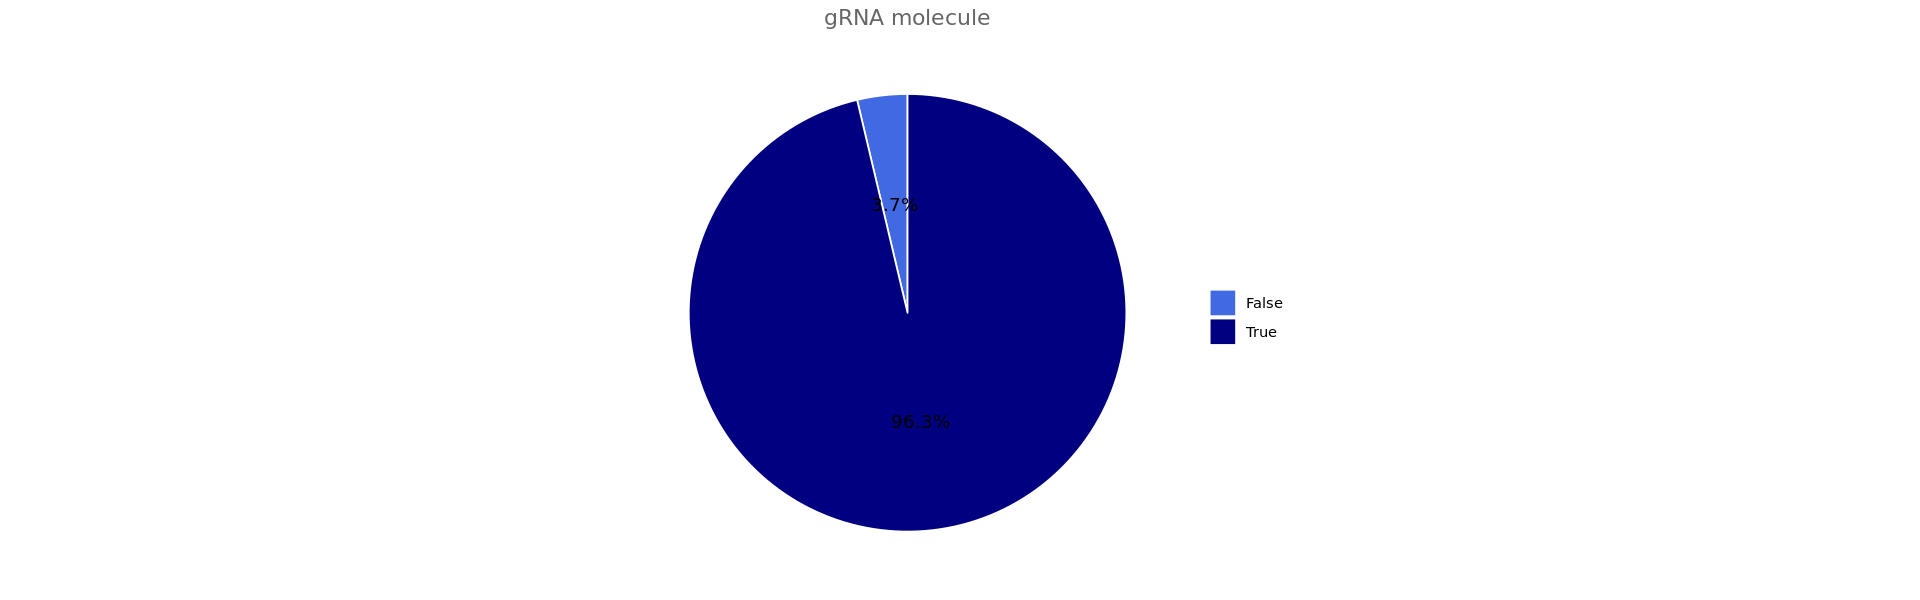

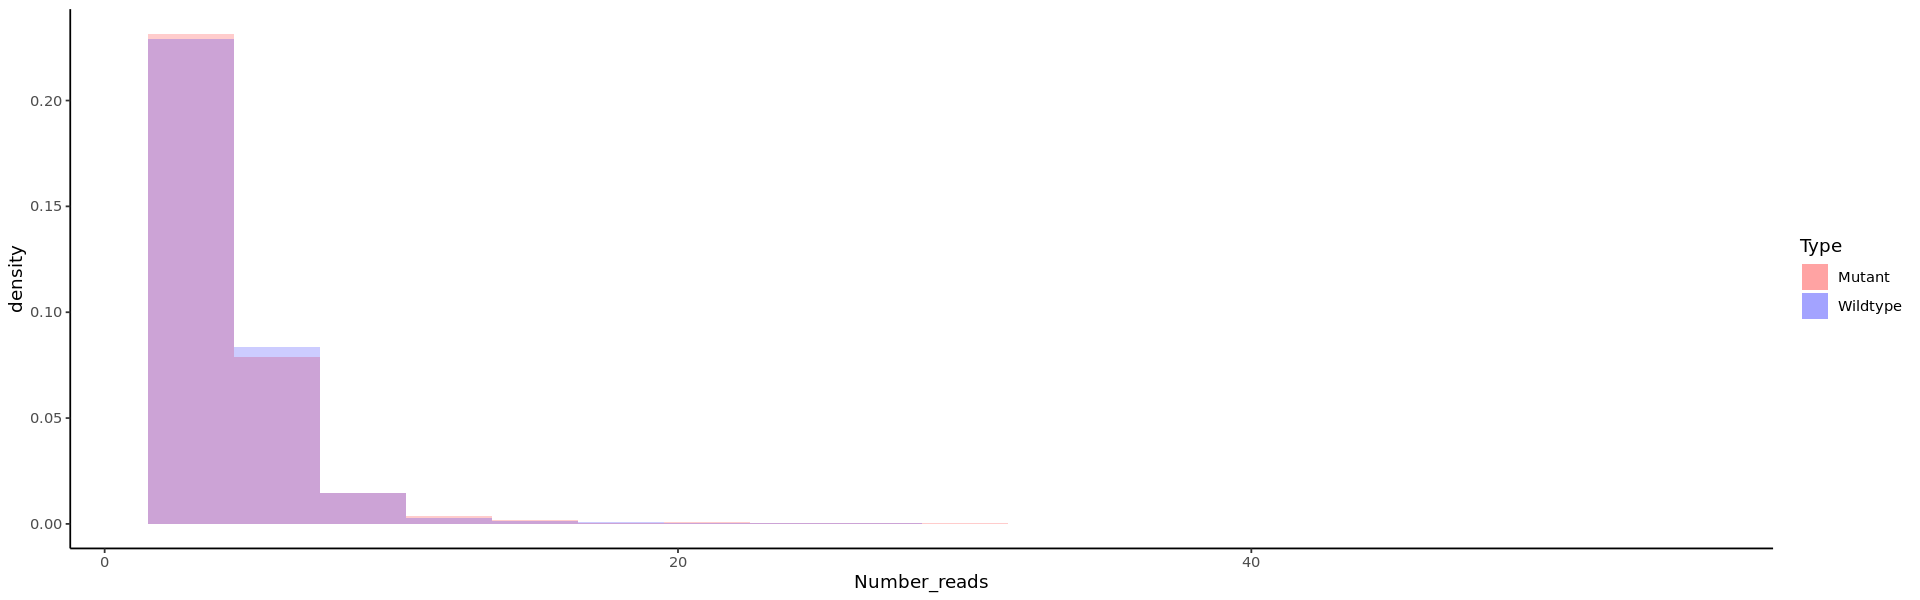

In [27]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


### source of mutation

In [34]:
#consensus.count.matrix <- source_mutation(input_dir)

`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.


[1] "MT_lib_prep: 617"
[1] "MT_virus: 1950"


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(4) D(5)    G I(1)    T 
  99   46   79    4    3    1    1   40    9   25 
[1] "MT mutation type"

  D   I   S 
 88   9 210 
[1] "MT mutation structure"

gRNA Rest   U6 
 216   71   20 


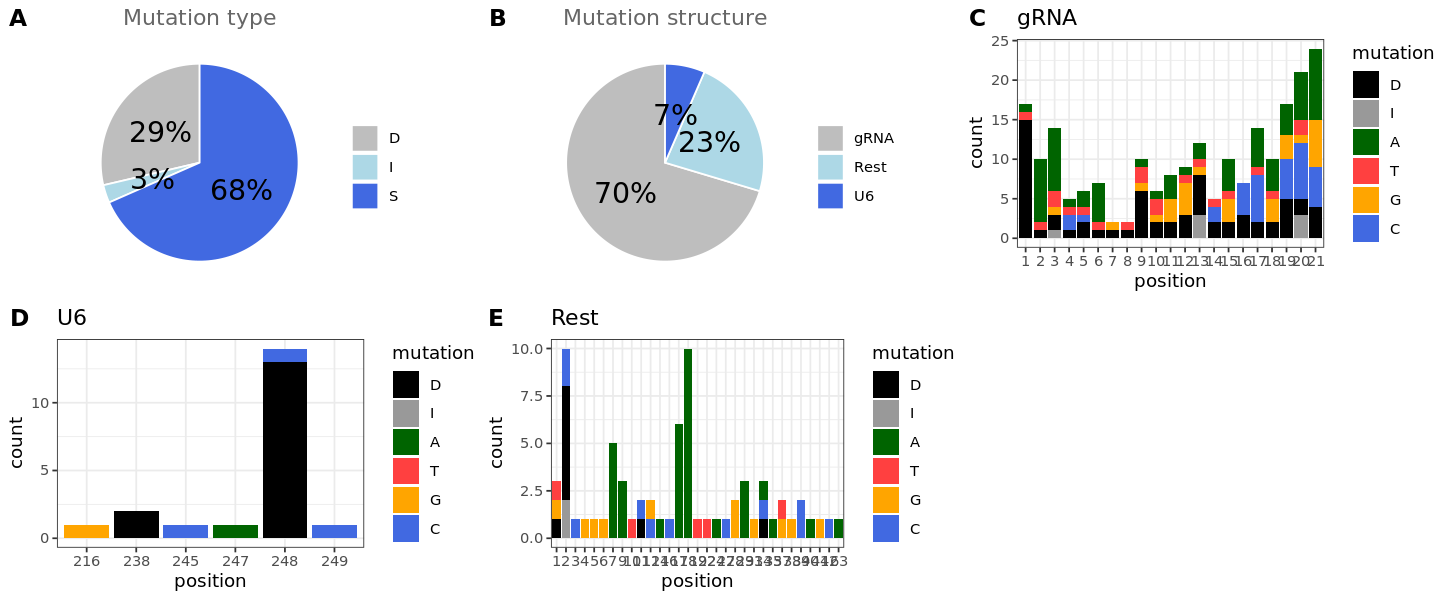

In [57]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)


* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [58]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.306   1.000   9.000 

In [60]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
dev.off()

Warning message:
“Removed 10 rows containing non-finite values (stat_count).”


png 
  2

### Cell assignment

Rows: 15092 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


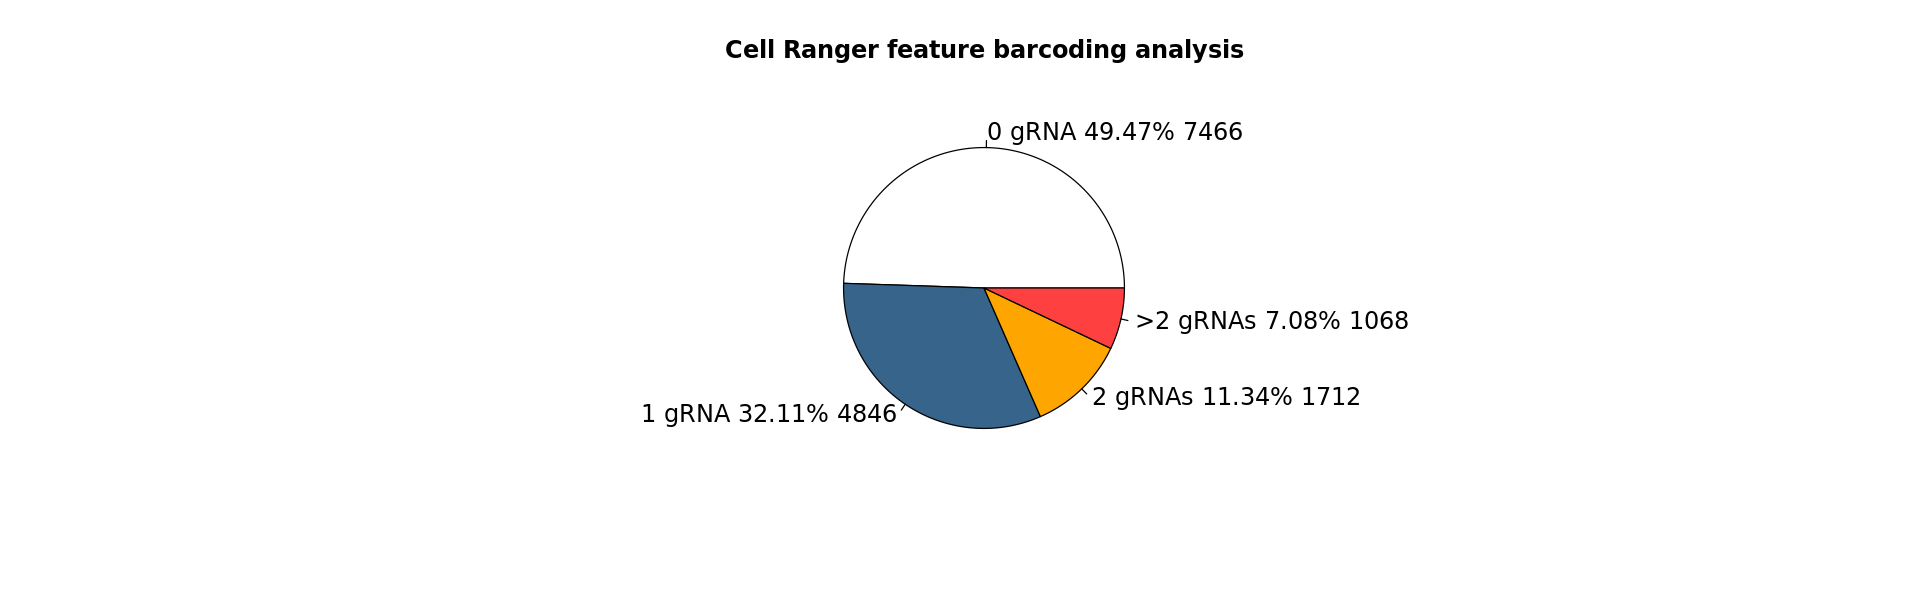

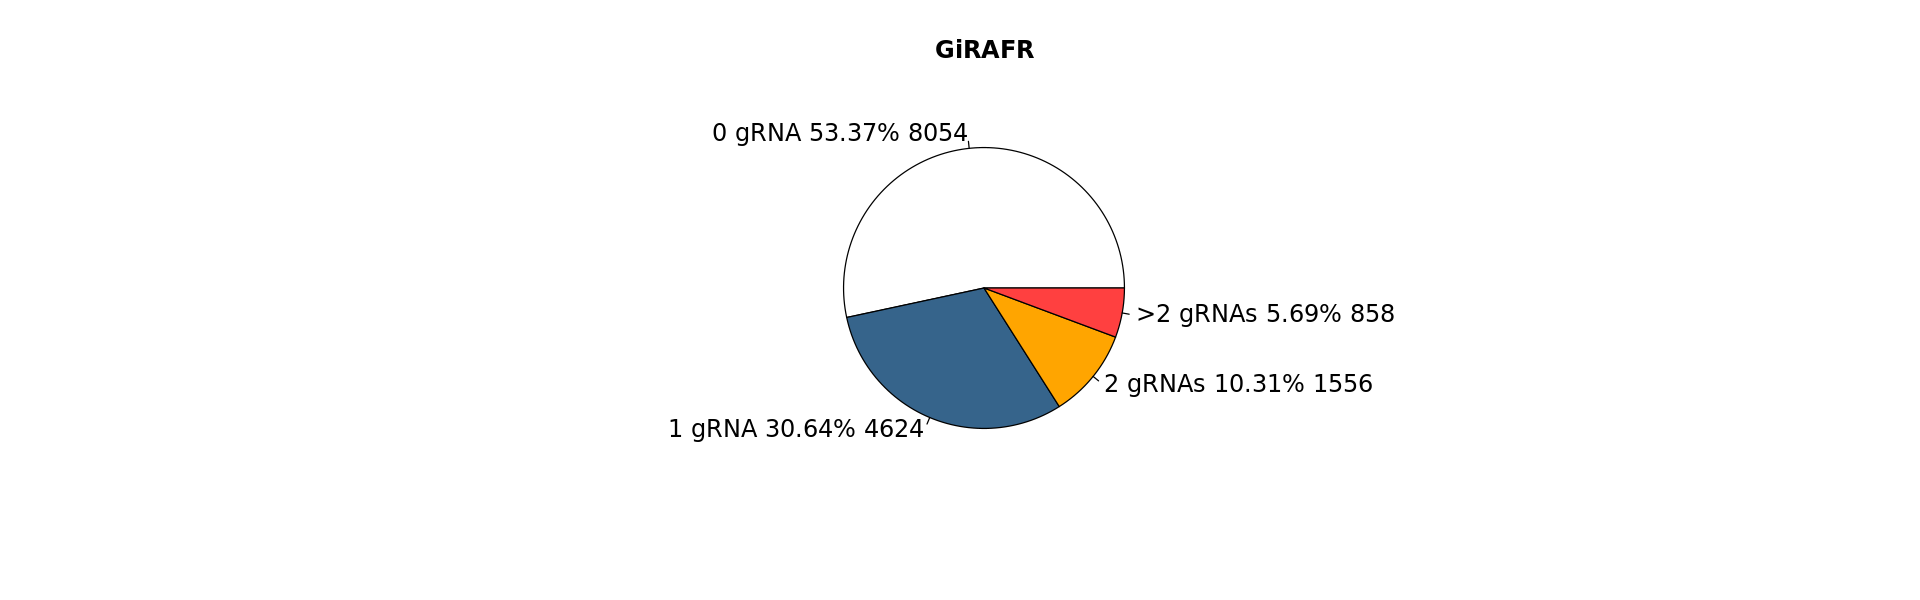

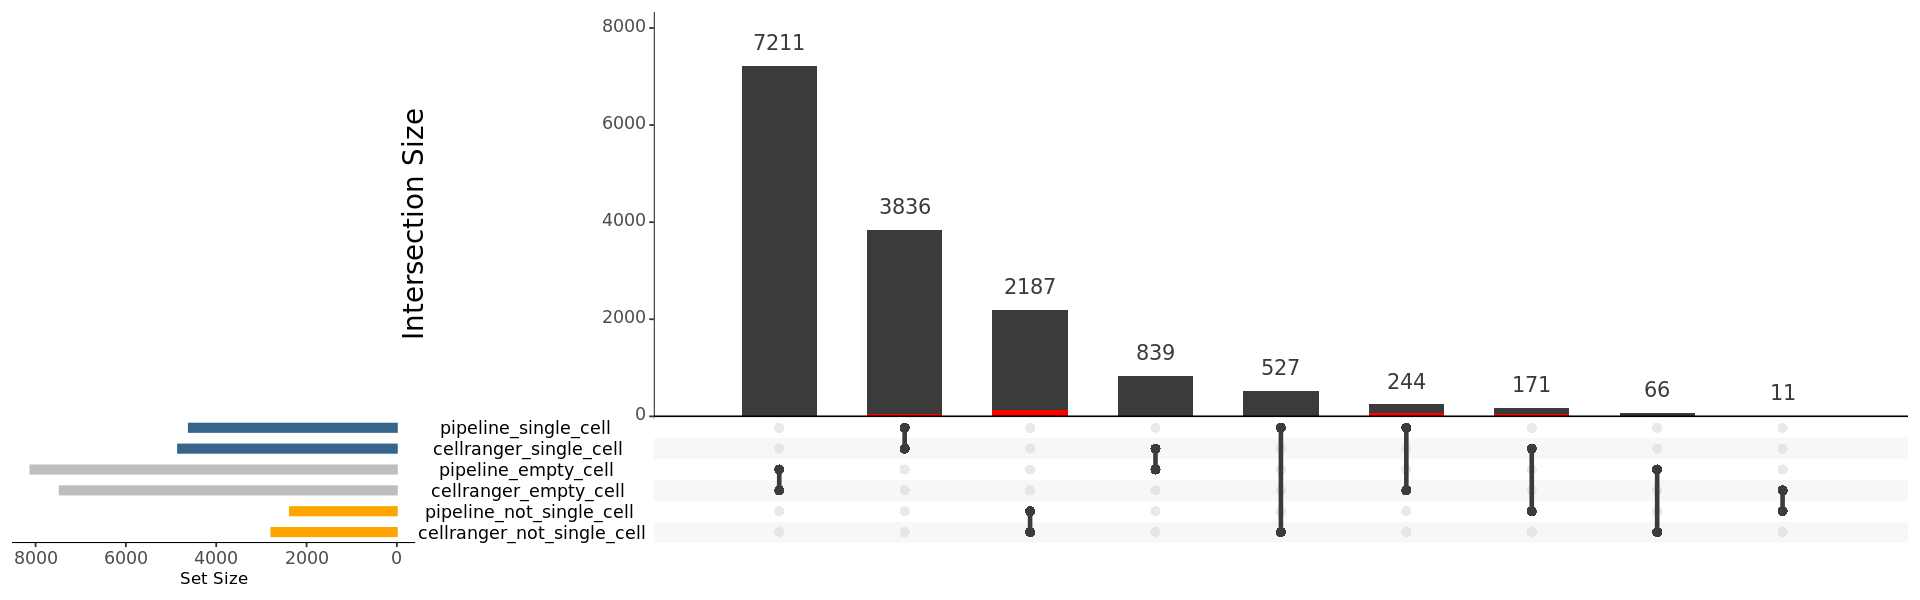

In [10]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_1/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_1/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"


compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)


# CROP-seq_CRISPRi_10x Lane_2

In [61]:
input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample2/'
output_dir = './figures_results/Tian_NatureNeuroscience/sample2'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 9698"
[1] "Wildtype UMI: 105728"
[1] "Mutant UMI: 4114"


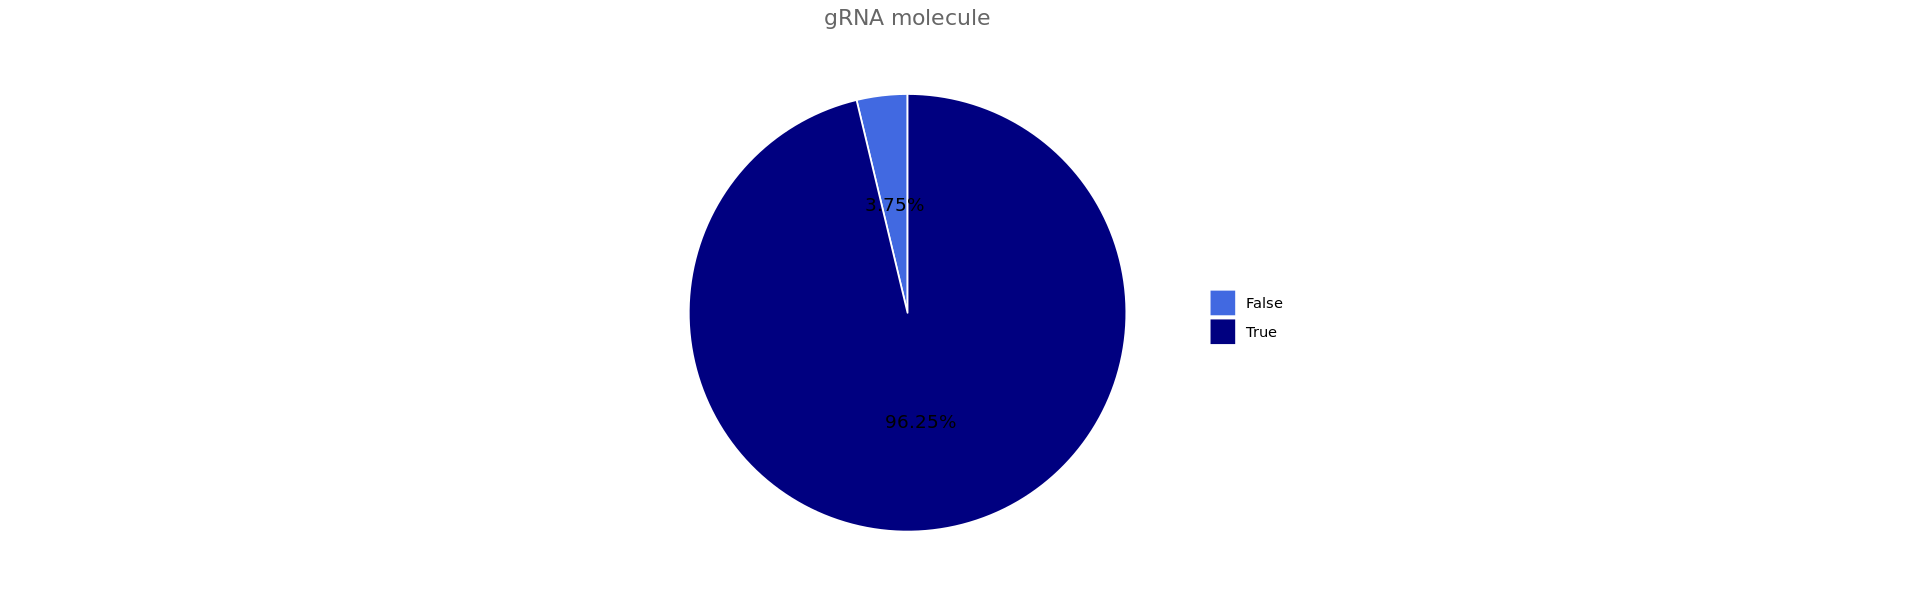

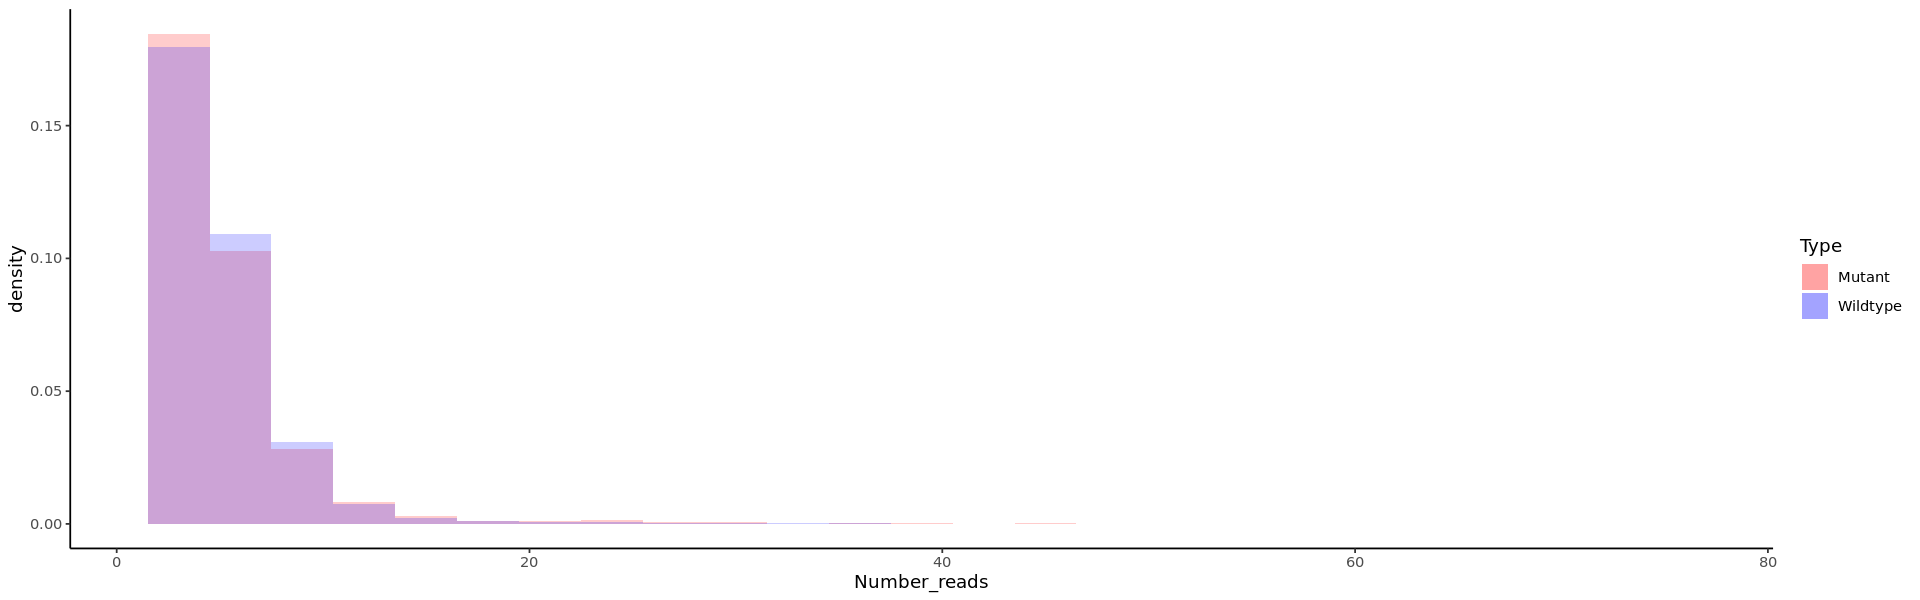

In [12]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


### source of mutation

In [49]:
#consensus.count.matrix <- source_mutation(input_dir)

`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.


[1] "MT_lib_prep: 887"
[1] "MT_virus: 3224"


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3) D(5) D(7)    G I(1) I(4)    T 
  97   29  111    7    4    1    1   22   14    1   28 
[1] "MT mutation type"

  D   I   S 
124  15 176 
[1] "MT mutation structure"

gRNA Rest   U6 
 233   55   27 


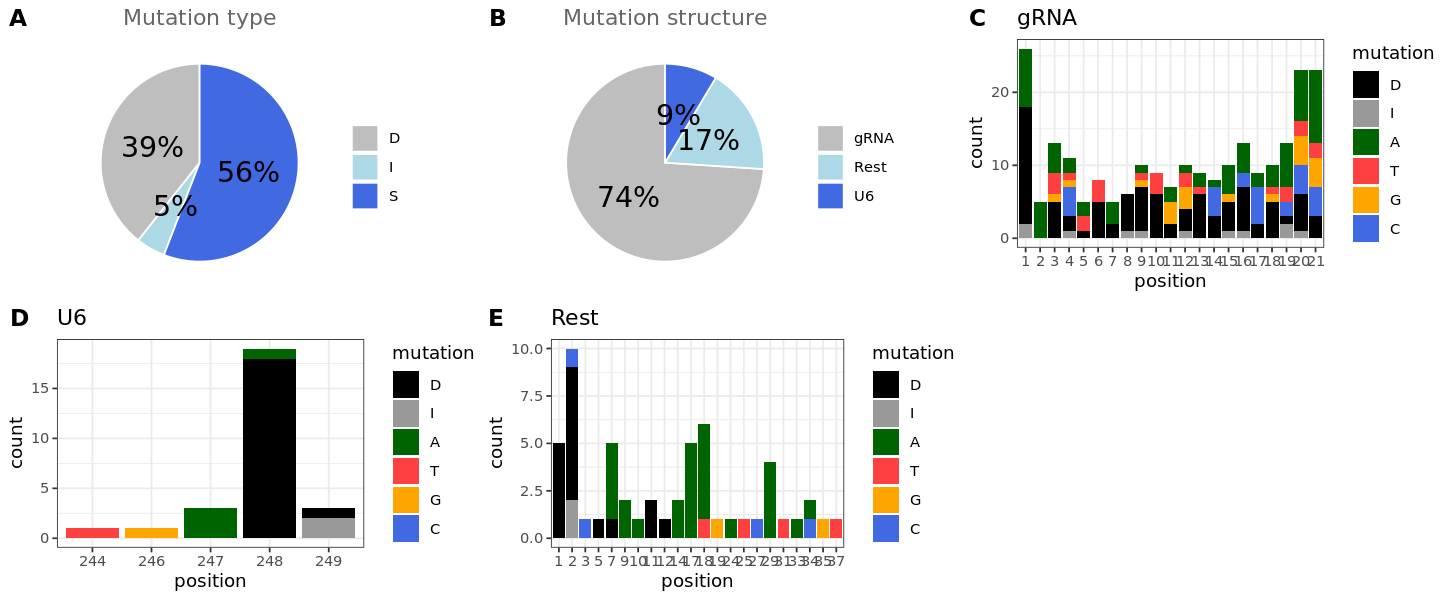

In [62]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)


* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [63]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.175   1.000   8.000 

In [64]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
dev.off()

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”


png 
  2

### Cell assignment

Rows: 14408 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


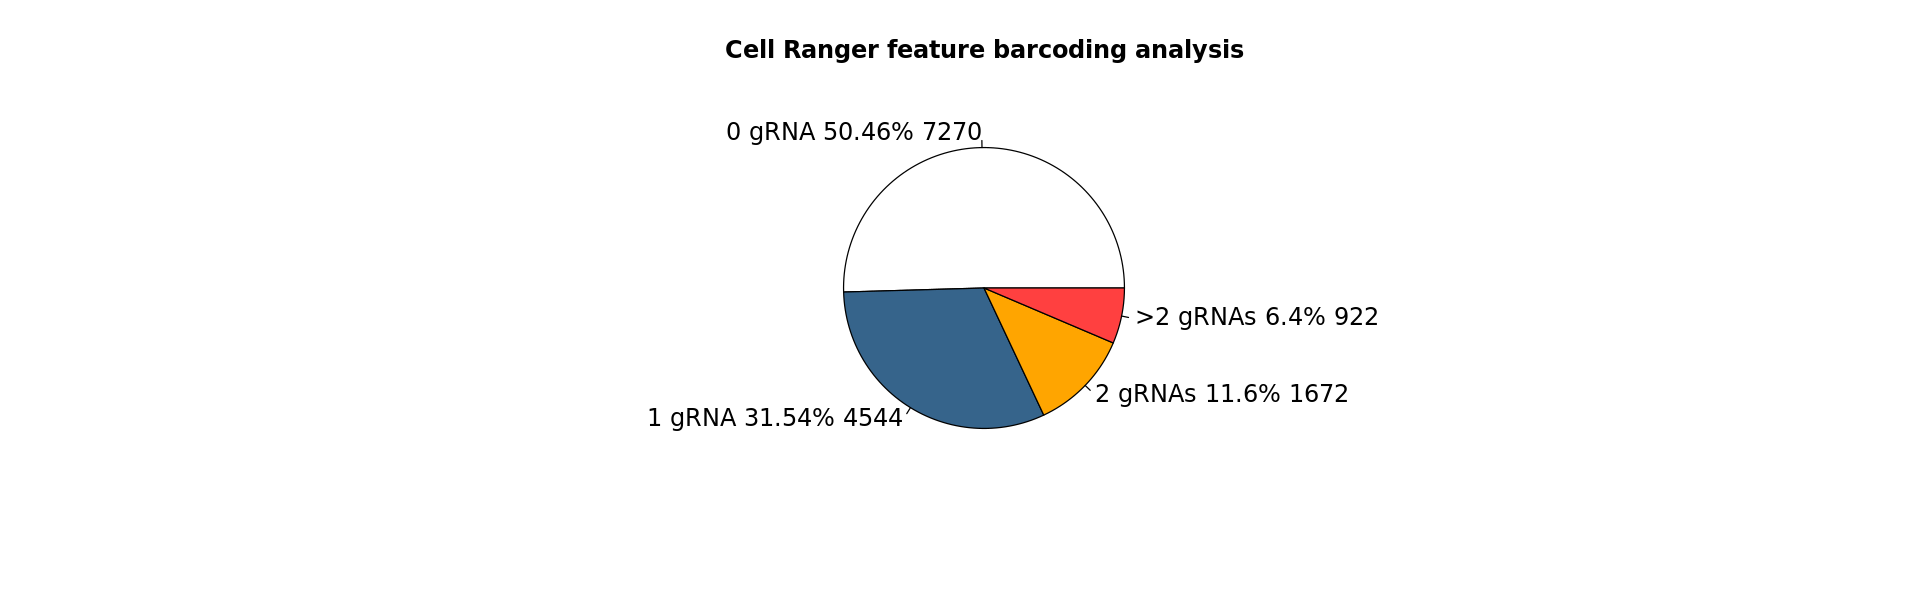

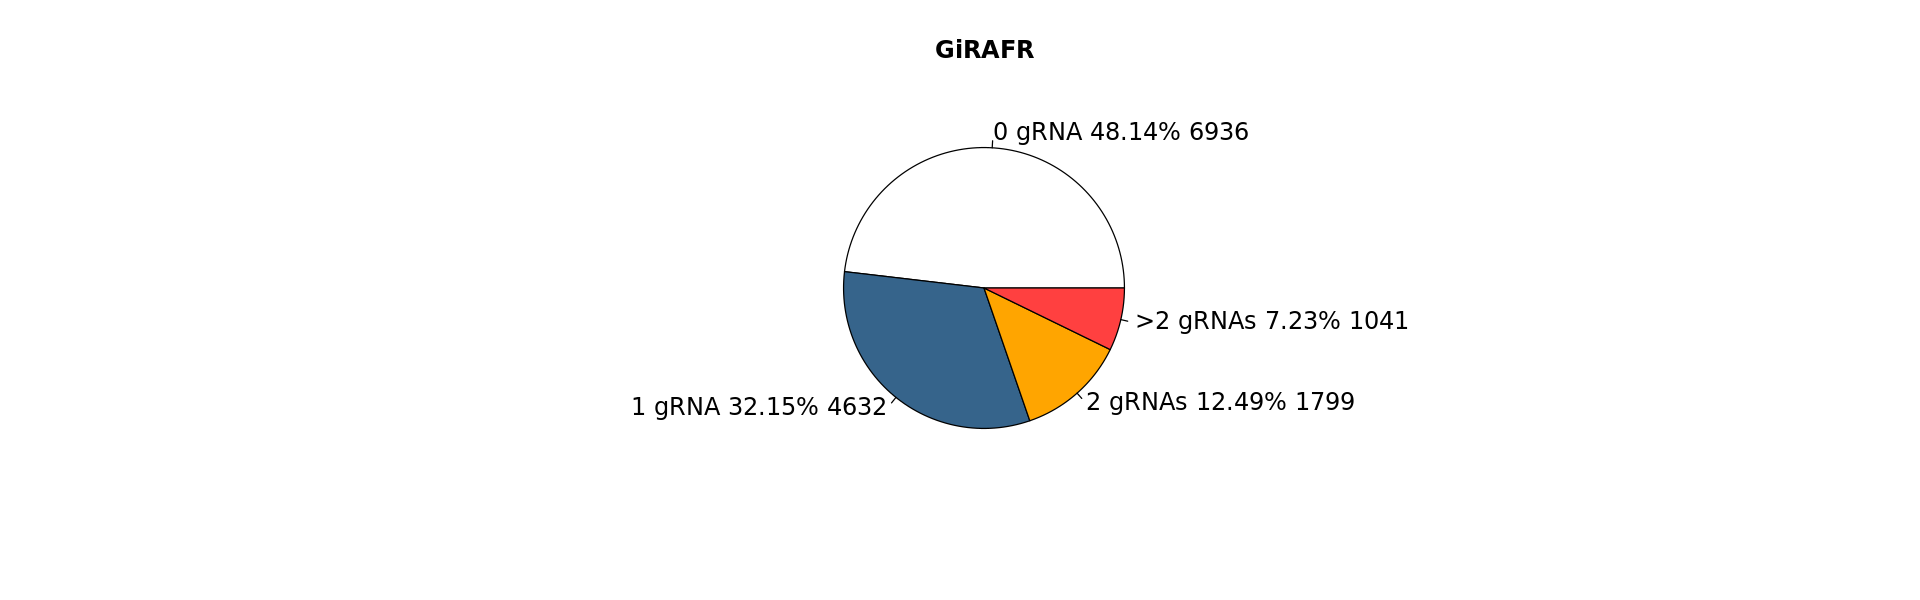

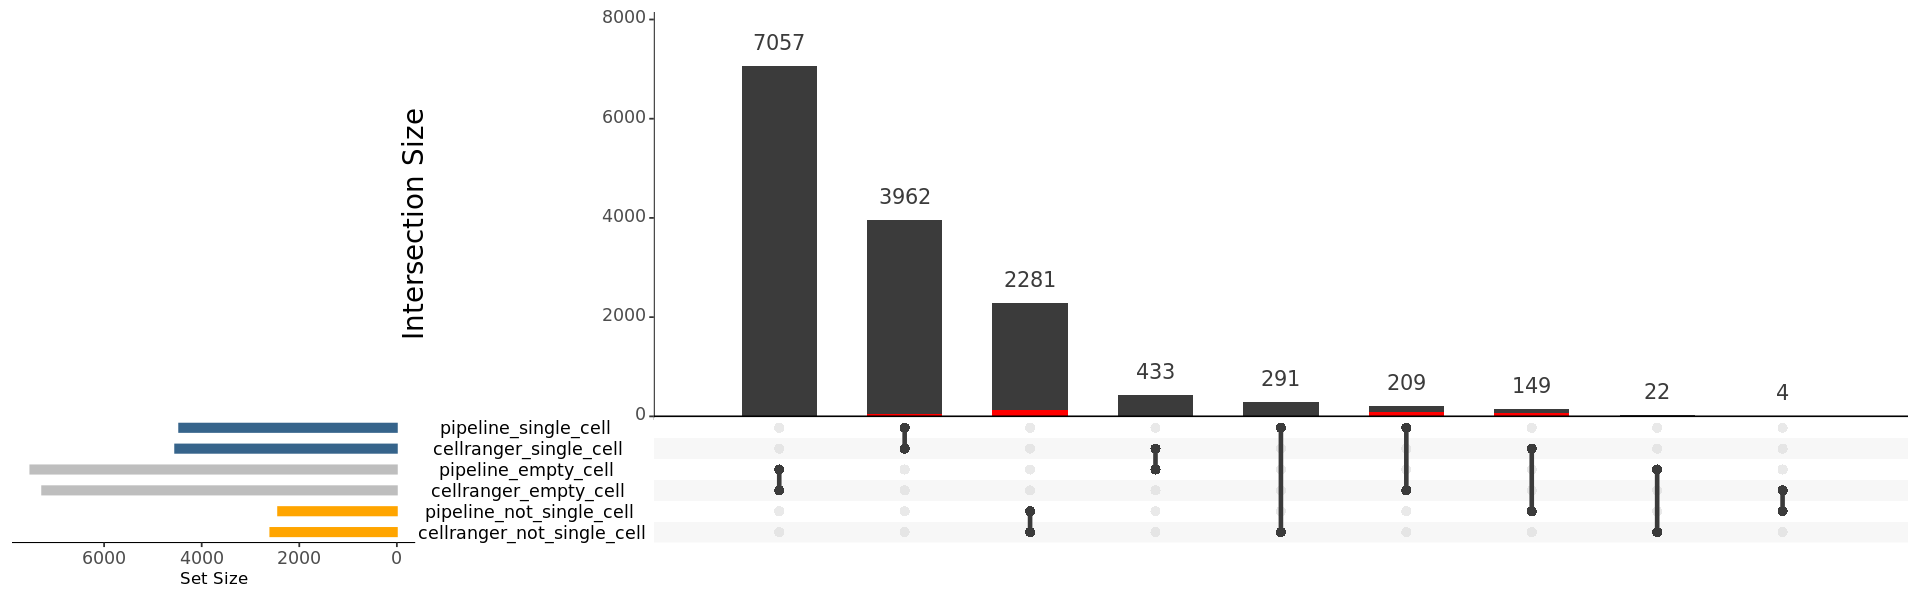

In [18]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_2/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_2/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)


# CROP-seq_CRISPRi_10x Lane_3

In [65]:
input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample3/'
output_dir = './figures_results/Tian_NatureNeuroscience/sample3'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 6586"
[1] "Wildtype UMI: 45660"
[1] "Mutant UMI: 1905"


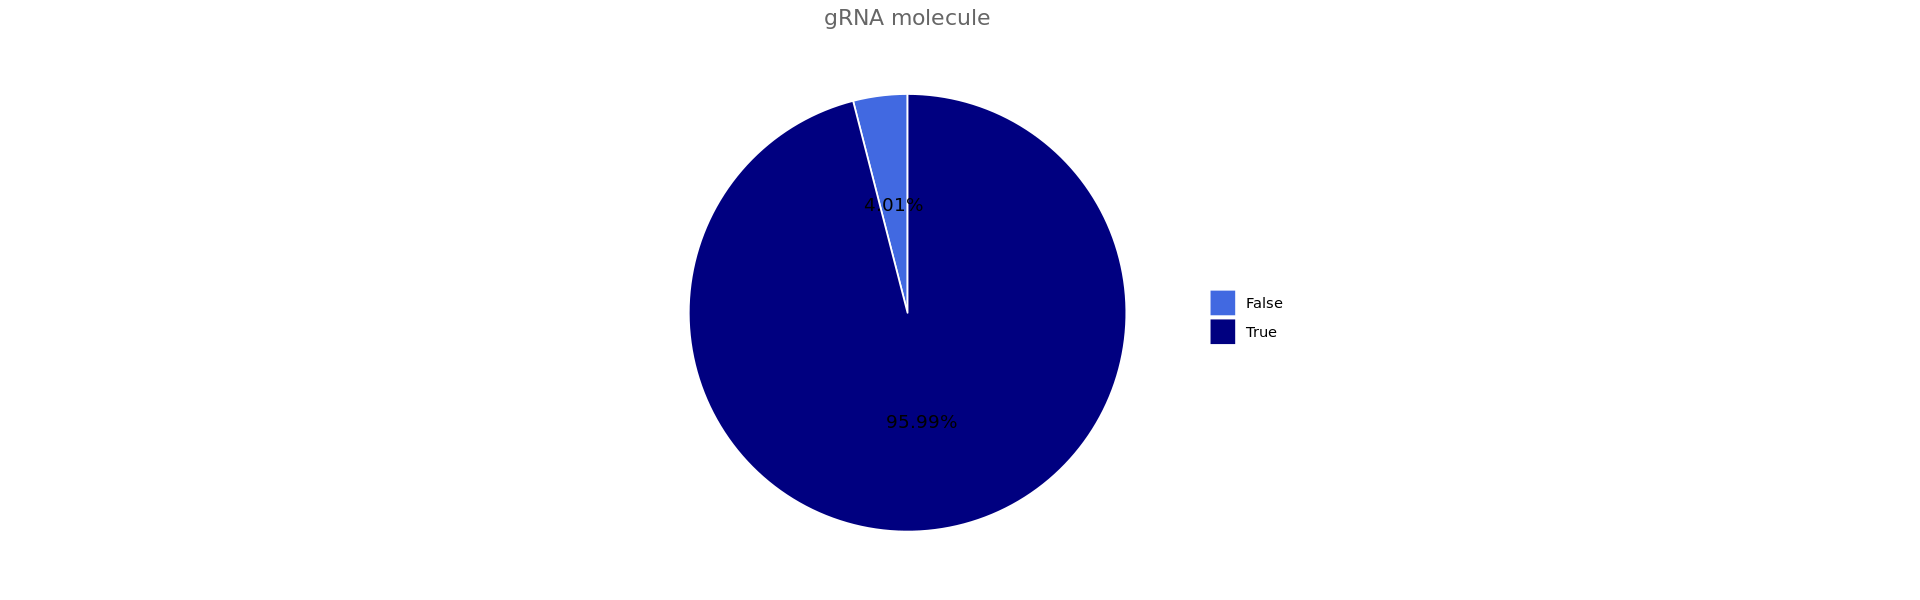

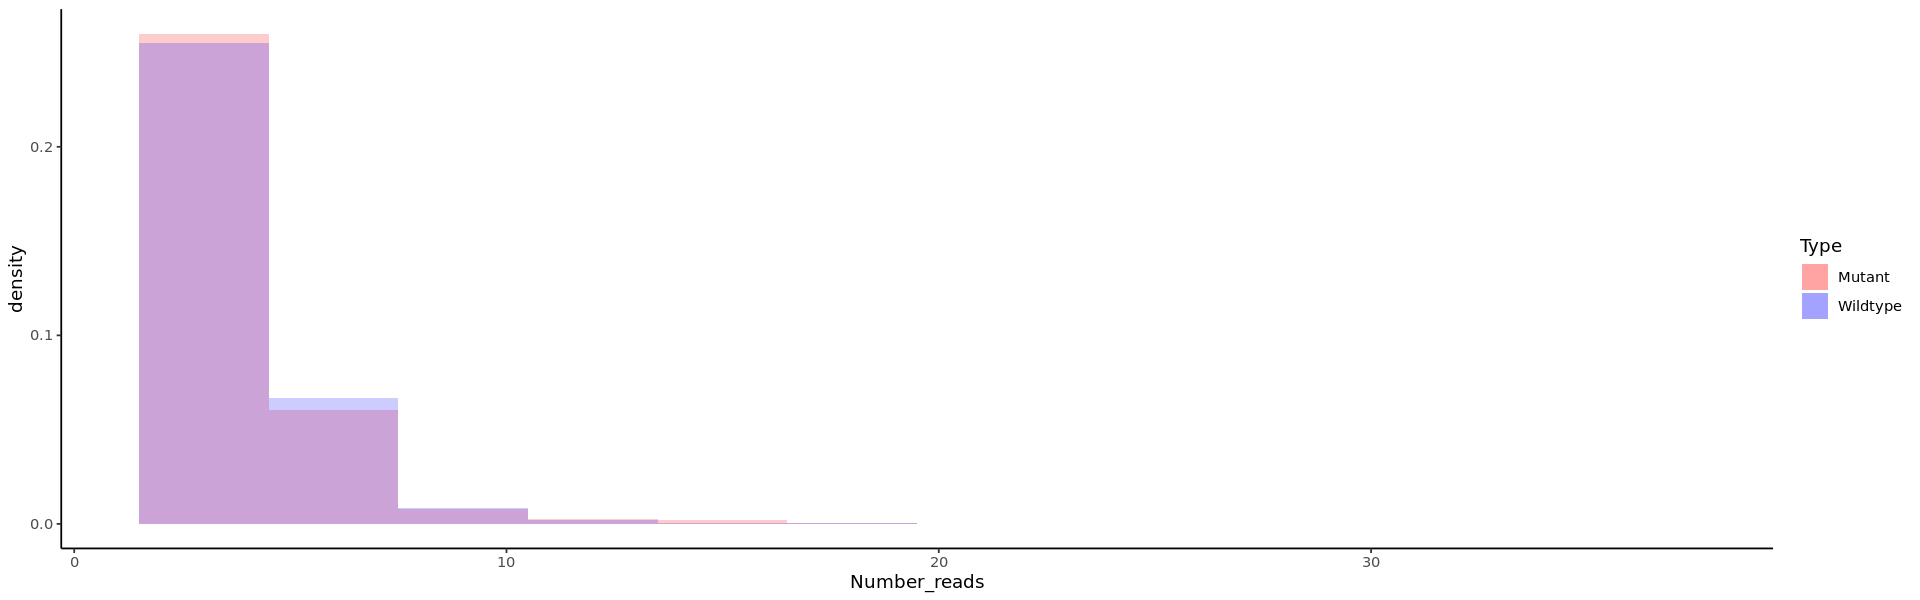

In [20]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

### source of mutation

In [62]:
#consensus.count.matrix <- source_mutation('../Tian_NatureNeuroscience/more_samples/lane_3/consensus.count.matrix')

`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.


[1] "MT_lib_prep: 423"
[1] "MT_virus: 1478"


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3)    G I(1) I(2)    T 
  73   16   72    4    2   31    6    2   22 
[1] "MT mutation type"

  D   I   S 
 78   8 142 
[1] "MT mutation structure"

gRNA Rest   U6 
 151   62   15 


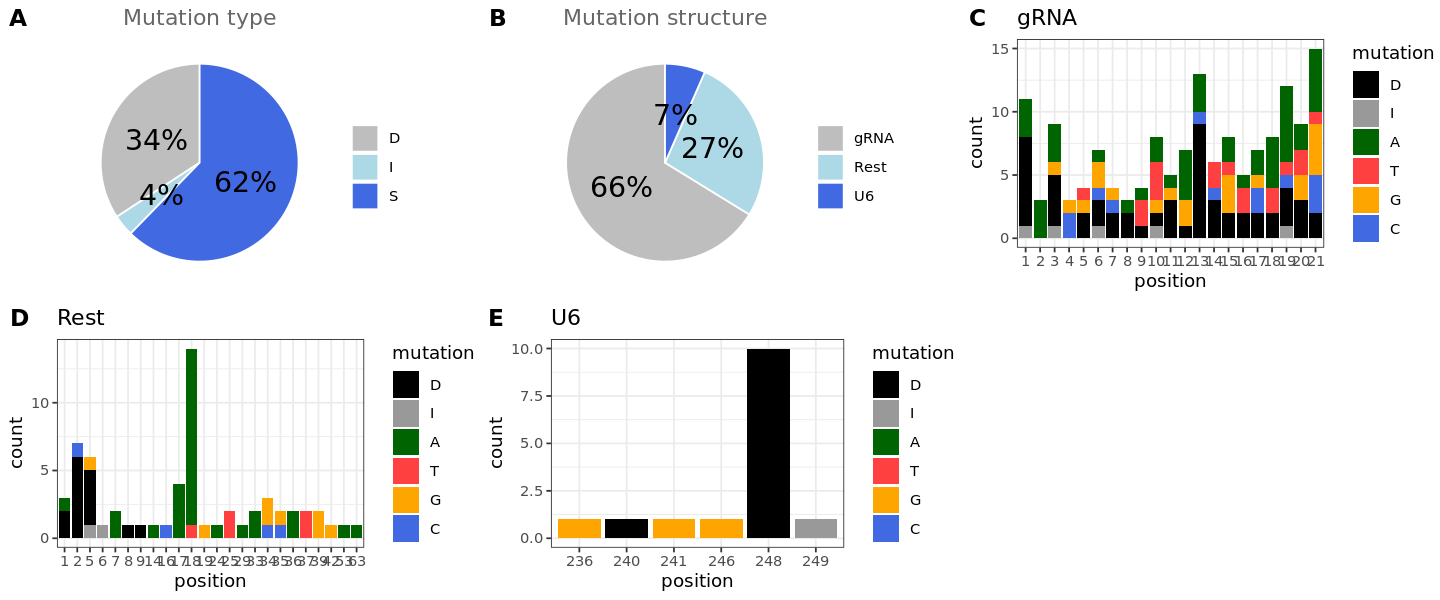

In [66]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)


* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [67]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.213   1.000   7.000 

In [68]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
dev.off()

Warning message:
“Removed 9 rows containing non-finite values (stat_count).”


png 
  2

### Cell assignment

Rows: 11974 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


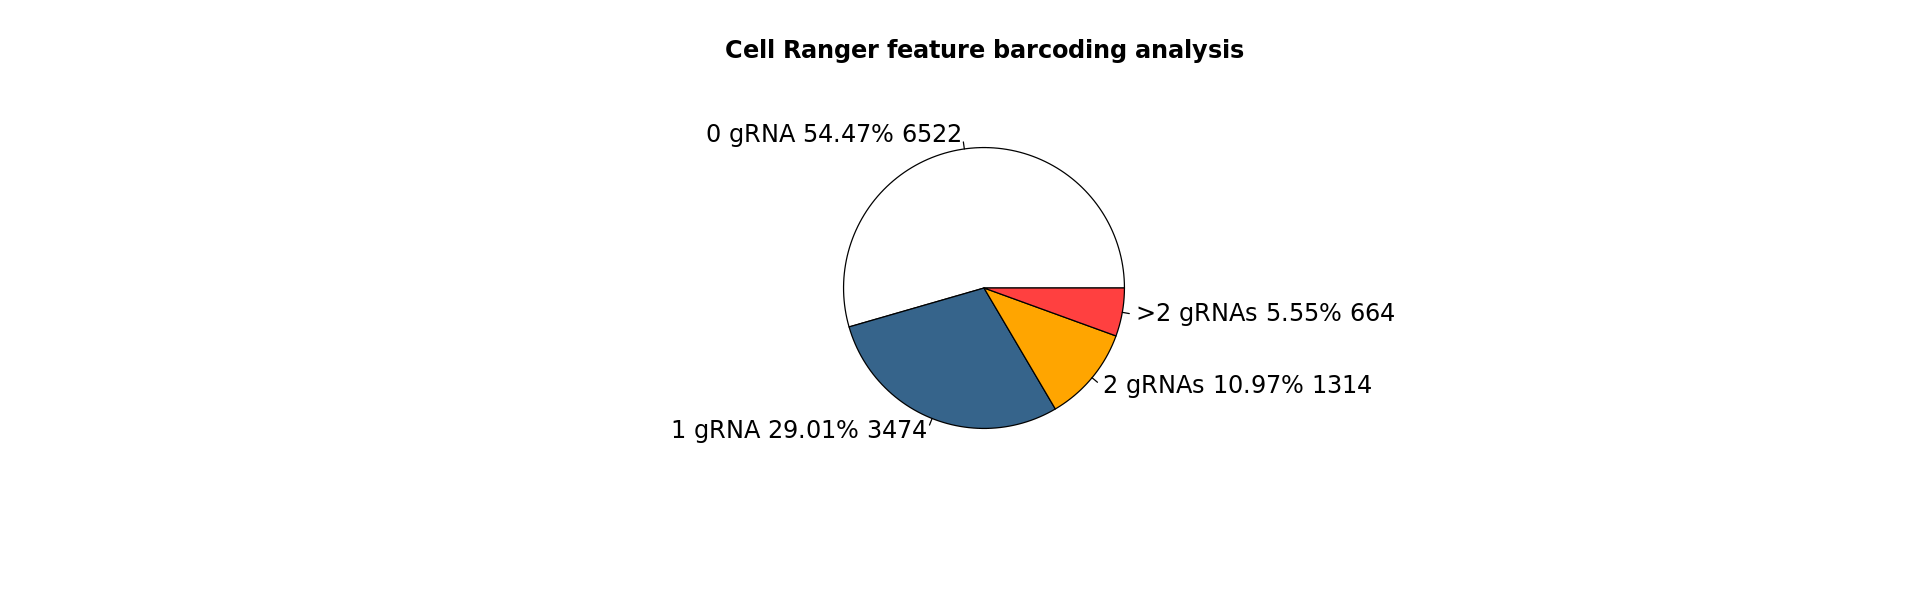

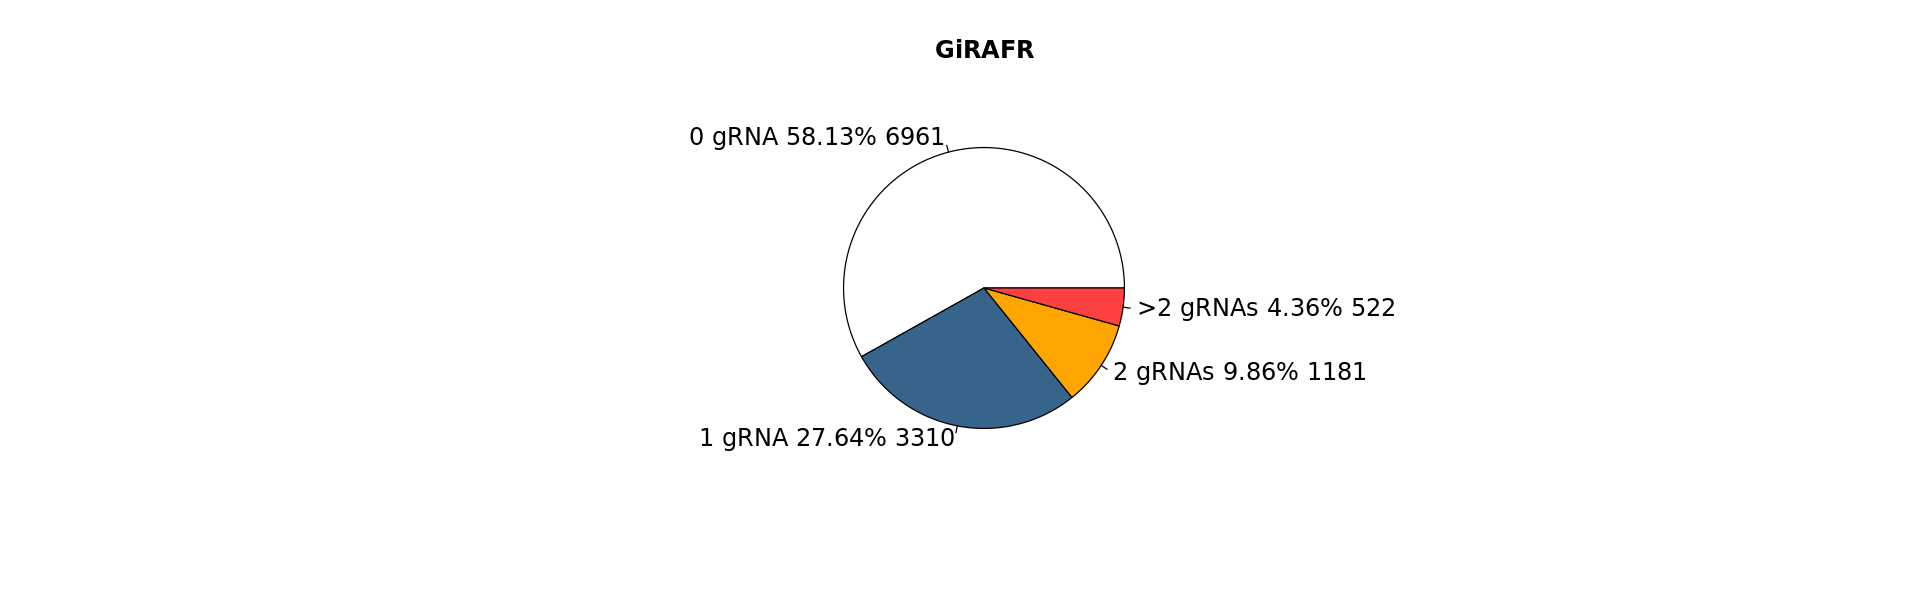

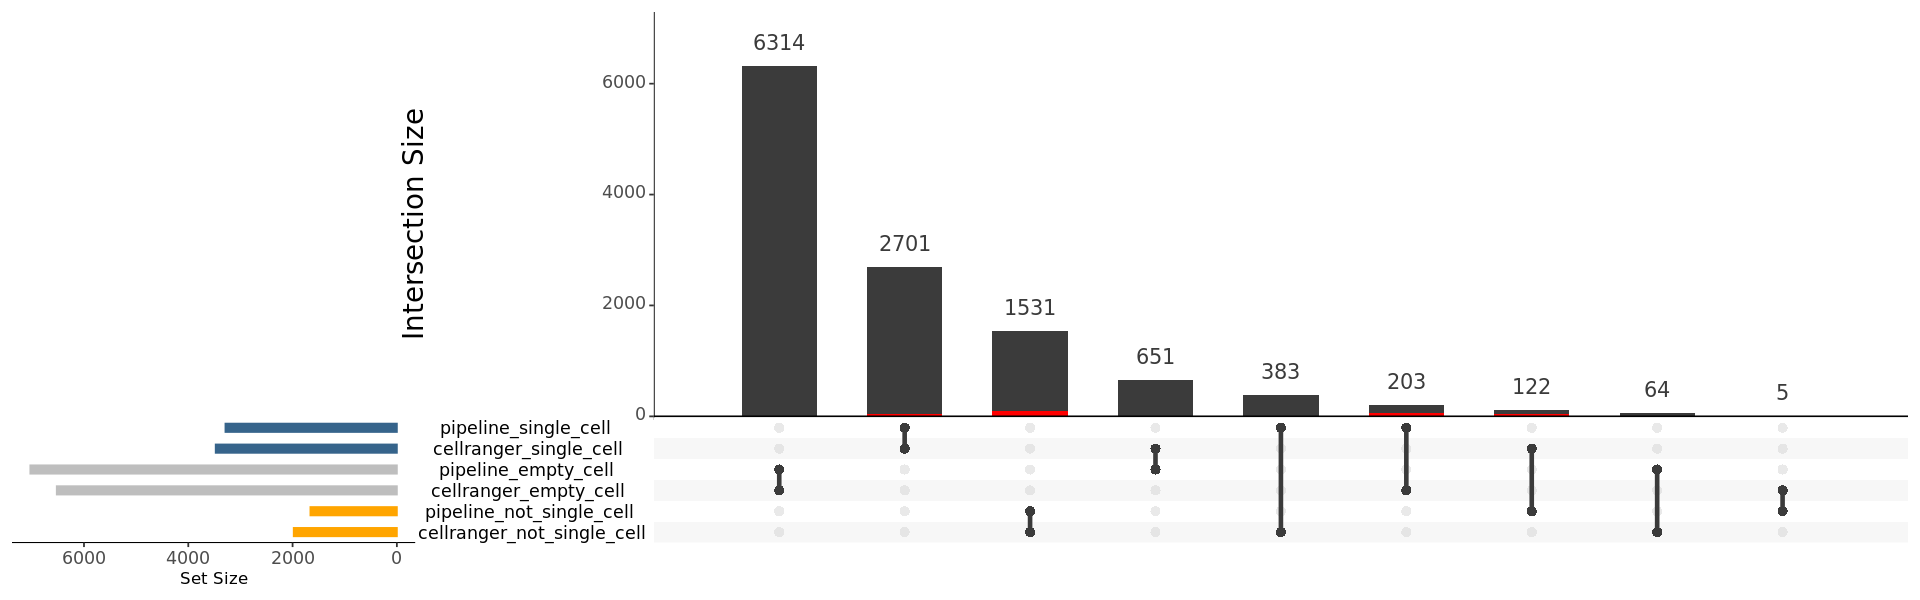

In [35]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_3/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_3/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"

compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)

# CROP-seq_CRISPRi_10x Lane_4

In [69]:
input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample4/'
output_dir = './figures_results/Tian_NatureNeuroscience/sample4'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 9842"
[1] "Wildtype UMI: 55111"
[1] "Mutant UMI: 2373"


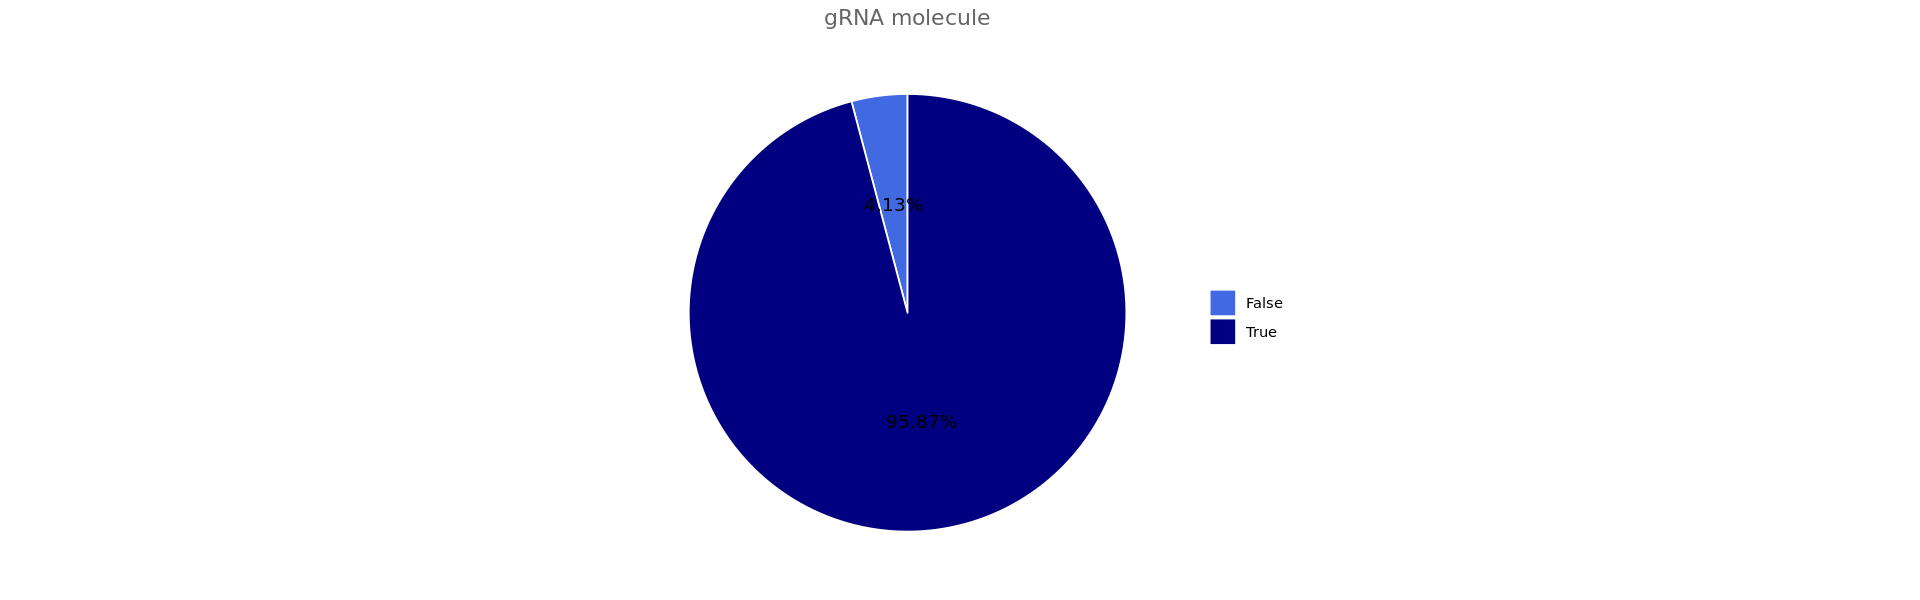

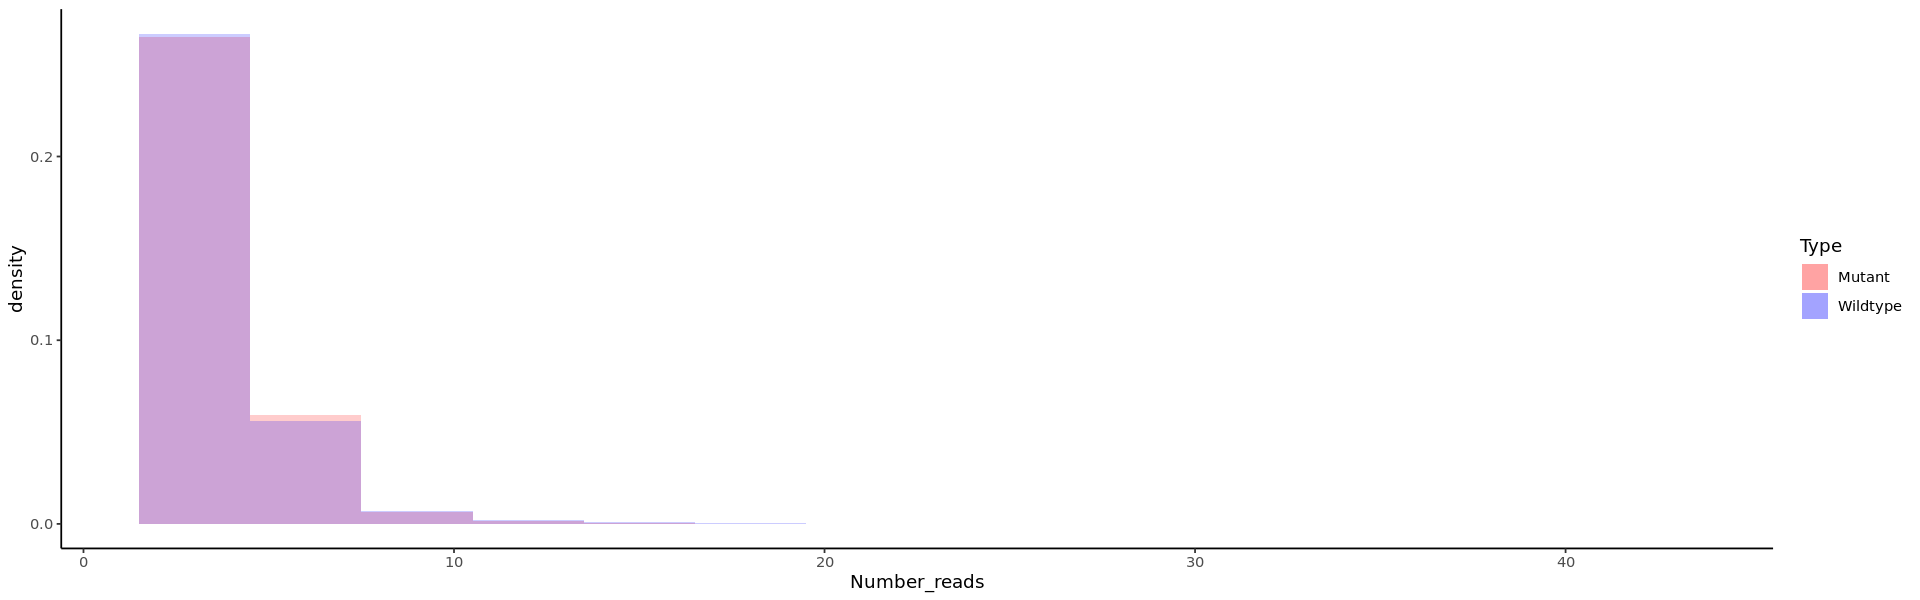

In [37]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

### source of mutation

In [74]:
#consensus.count.matrix <- source_mutation(input_dir)


`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Cell', 'gRNA_target'. You can override using the `.groups` argument.


[1] "MT_lib_prep: 473"
[1] "MT_virus: 1895"


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(4)    G I(1) I(2)    T 
 111   40  100   11    2   69   15    1   50 
[1] "MT mutation type"

  D   I   S 
113  16 270 
[1] "MT mutation structure"

gRNA Rest   U6 
 243  117   39 


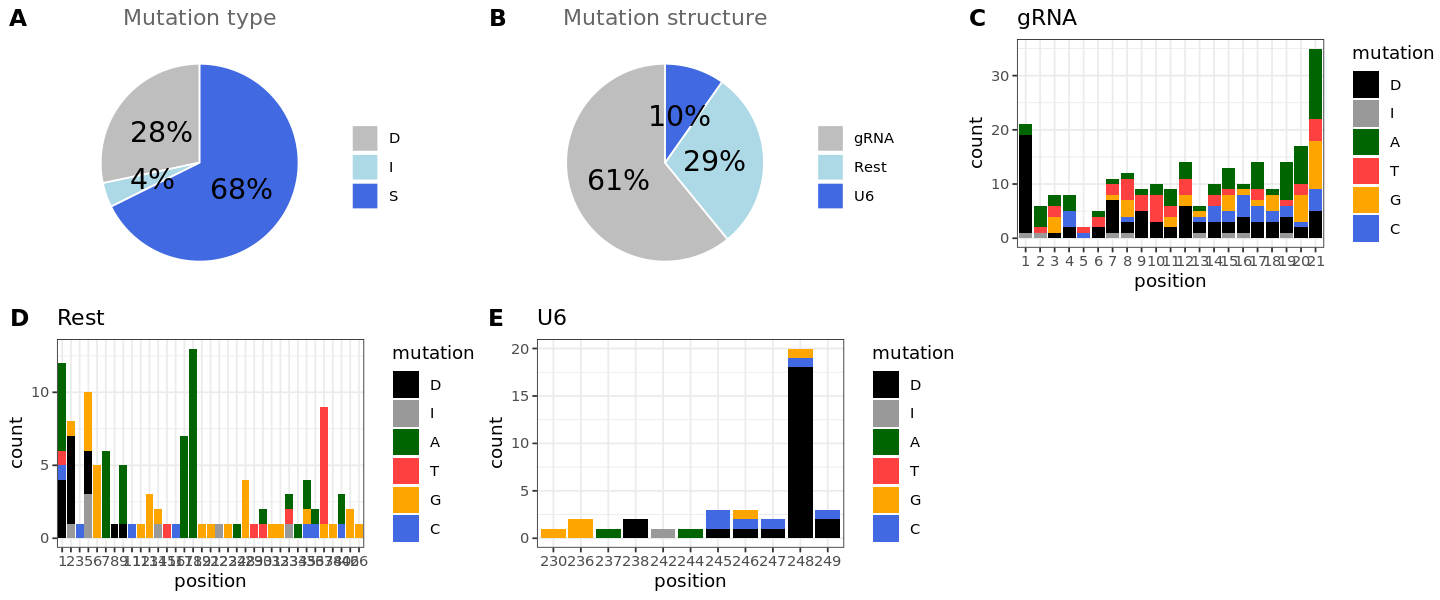

In [70]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [71]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.228   1.000  11.000 

In [72]:
save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
dev.off()

Warning message:
“Removed 18 rows containing non-finite values (stat_count).”


png 
  2

### Cell assignment

Rows: 17183 Columns: 1
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'cb'. You can override using the `.groups` argument.


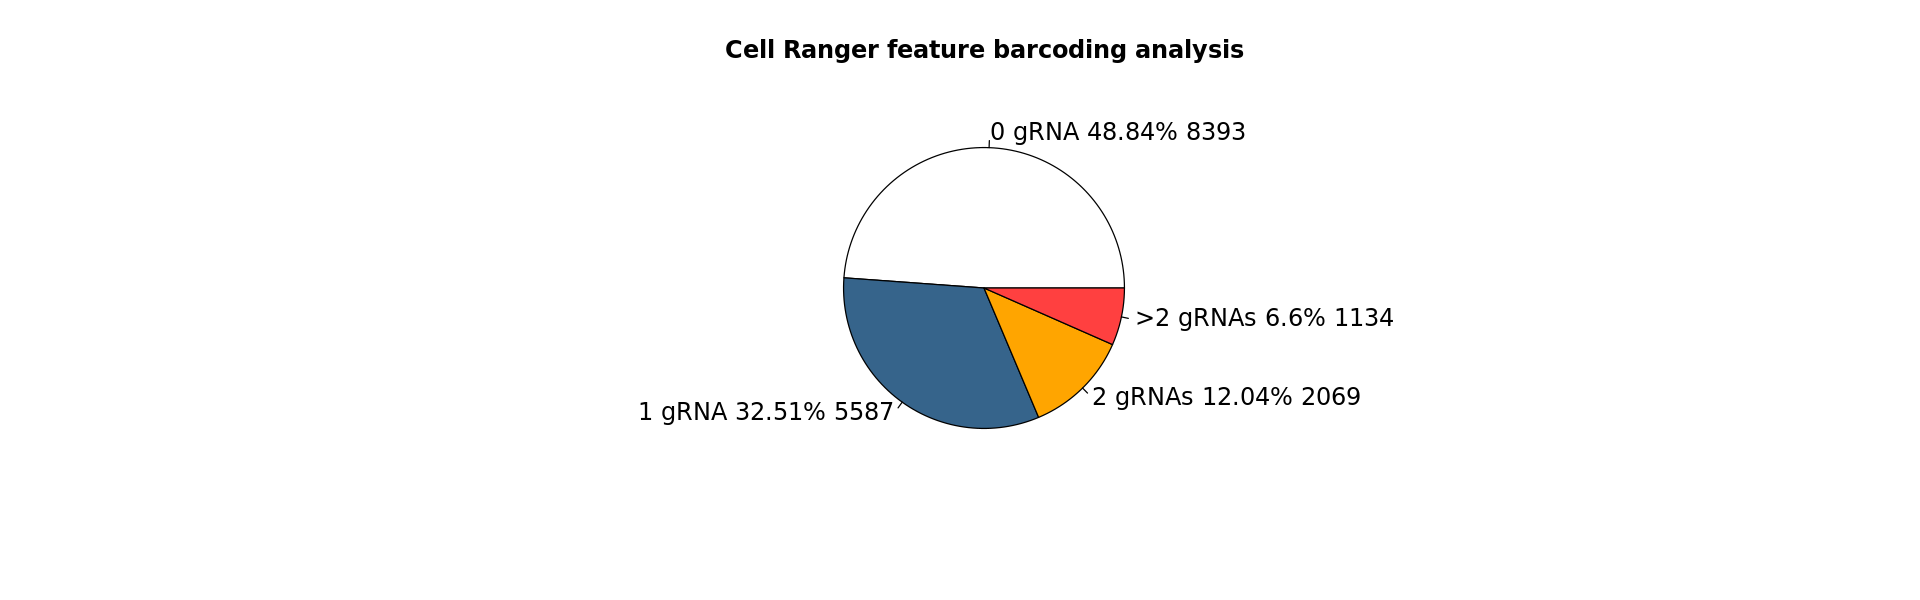

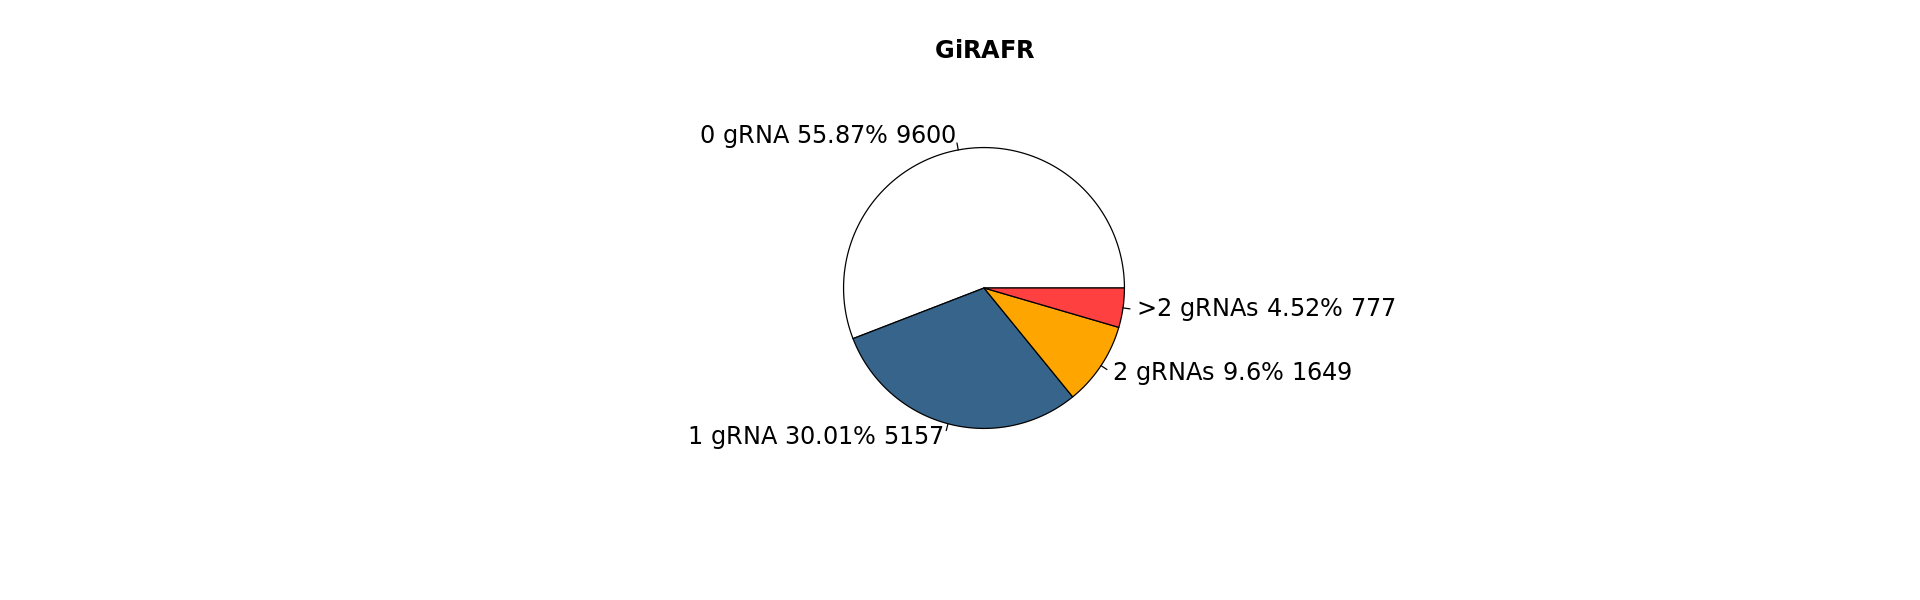

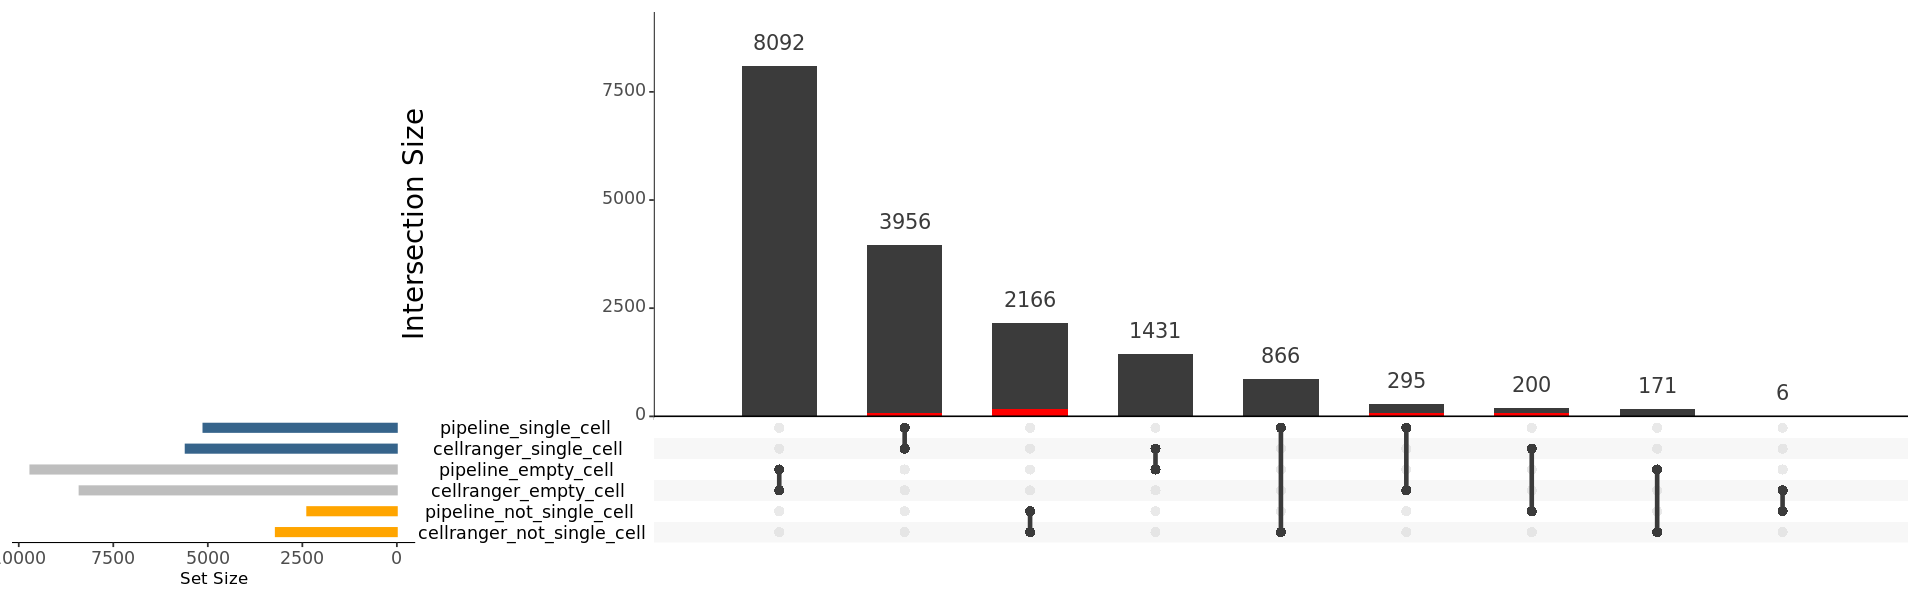

In [44]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_4/outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_4/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"


compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir)


# combine samples MT pattern

In [73]:
rm(list = ls())
my_colors <- c("D" = 'black', 'I' = 'grey60', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample1/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample1 <- read.table(MT_file, header = FALSE)
colnames(MT_sample1) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample2/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample2 <- read.table(MT_file, header = FALSE)
colnames(MT_sample2) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample3/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample3 <- read.table(MT_file, header = FALSE)
colnames(MT_sample3) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Tian_NatureNeuroscience/sample4/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample4 <- read.table(MT_file, header = FALSE)
colnames(MT_sample4) <- c('gene name','structure','structure length', 'position','mutation','variant number')

save_pdf <- paste0('./figures_results/Tian_NatureNeuroscience/', 'Combined.all.MT_position_adjusted.pdf')
pdf(save_pdf, width = 16, height = 5)

MT2 <- rbind(rbind(rbind(MT_sample1, MT_sample2), MT_sample3), MT_sample4)
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20, 55, by =1))
MT2$mutation2 <- MT2$mutation
MT2$mutation2[grepl('D', MT2$mutation2)] <- 'D' 
MT2$mutation2[grepl('I', MT2$mutation2)] <- 'I'
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))


ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(aes(y = (..count..)/4))+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(aes(y = (..count..)/4))+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,25))
dev.off()

Warning message:
“Removed 38 rows containing non-finite values (stat_count).”
Warning message:
“Removed 38 rows containing non-finite values (stat_count).”


png 
  2

# cell number comparison

In [84]:
filtered_barcodes <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/paper/Tian_NatureNeuroscience/barcodes.tsv', header = FALSE)
filtered_barcodes$V1 <- sub('-1','',filtered_barcodes$V1)
nrow(filtered_barcodes)
mapped_single_sgRNA_to_cell_lib1 <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/mapped_single_sgRNA_to_cell_lib1.txt')
mapped_single_sgRNA_to_cell_lib1$V1 <- sub('-1','',mapped_single_sgRNA_to_cell_lib1$V1)
dim(mapped_single_sgRNA_to_cell_lib1)

sum(mapped_single_sgRNA_to_cell_lib1$V1 %in% filtered_barcodes$V1)


[1] 15008

[1] 24757     2

[1] 8279

Many cells from the paper are not in the filtered cell barcodes

In [85]:
seurat <- Read10X_h5('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/GSM4632022_CRISPRi_filtered_feature_bc_matrix_lib1.h5')


In [86]:
dim(seurat)
sum(mapped_single_sgRNA_to_cell_lib1$V1 %in% sub('-1','',colnames(seurat)))

[1] 33538 15092

[1] 8297

Here the number of filtered cell barcodes is consistent with our analysis

We take the overlapped cell barcodes with our filtered cell barcodes to continue: -> 8279

This paper only gave the number of cell with single guide

In [87]:
n_col = max(count.fields('../Tian_NatureNeuroscience/re-run/cells.gRNA.txt', sep = "\t"))
cells.gRNA <- read.table('../Tian_NatureNeuroscience/re-run/cells.gRNA.txt', 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)
                                     
colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
nrow(cells.num_features)
table(cells.num_features$num_features)

protospacer_calls_per_cell <-read.csv('/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/feature_barcoding_analysis/lane_1/outs/crispr_analysis/protospacer_calls_per_cell.csv', stringsAsFactors = FALSE)
protospacer_calls_per_cell$cell_barcode <- sub('-1','',protospacer_calls_per_cell$cell_barcode )

filtered_barcodes.merged <- merge(filtered_barcodes, cells.num_features, by.x = 'V1', by.y = 'cb', all.x = TRUE)
filtered_barcodes.merged <- merge(filtered_barcodes.merged,protospacer_calls_per_cell, suffixes = c('.girafr','.cellranger'),
                                  by.x = 'V1', by.y ='cell_barcode', all.x = TRUE)
filtered_barcodes.merged[is.na(filtered_barcodes.merged)] <- 0


[1] 7038


   1    2    3    4    5    6    7    8    9   10   11   12   16 
4624 1556  564  164   68   30   13    7    5    3    1    2    1 

Warning message:
“Removed 6729 rows containing non-finite values (stat_count).”


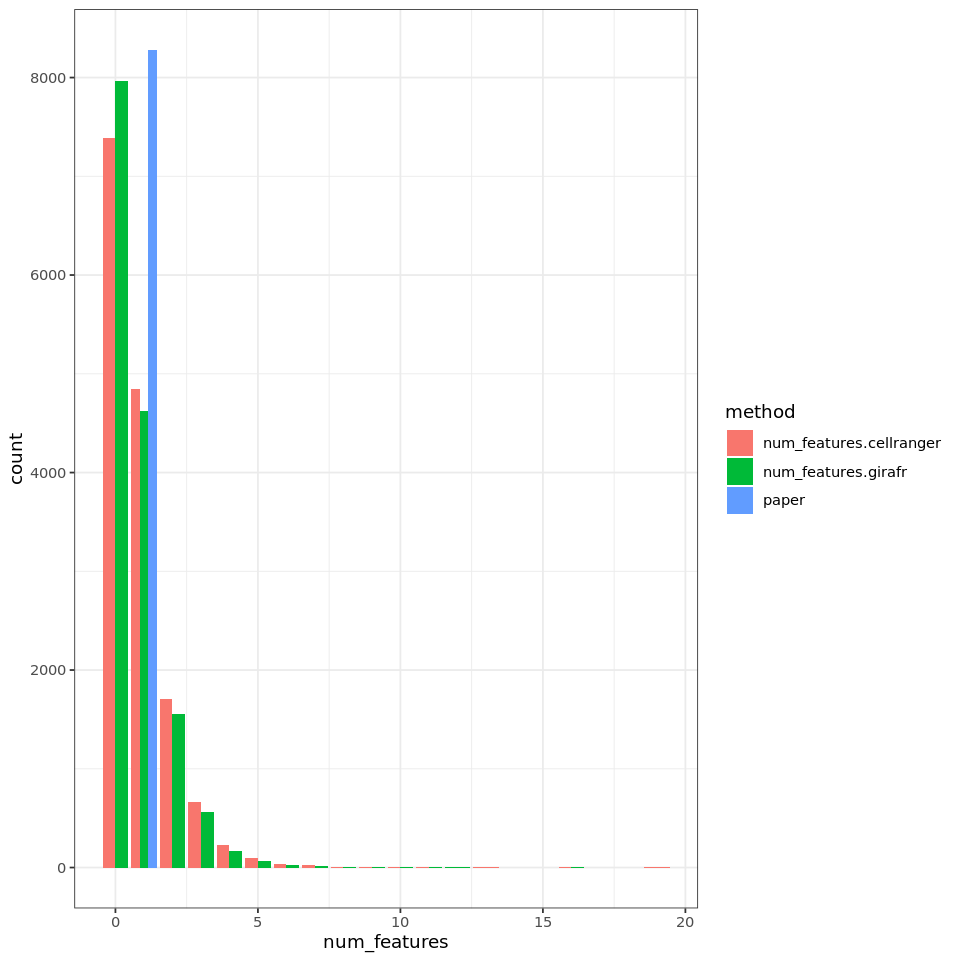

In [88]:
filtered_barcodes.merged <- merge(filtered_barcodes.merged, mapped_single_sgRNA_to_cell_lib1, by = 'V1', all.x = TRUE)
filtered_barcodes.merged$paper <- ifelse(is.na(filtered_barcodes.merged$V2),NA,1)
filtered_barcodes_merged.all.long <-  gather(filtered_barcodes.merged[,c(1:3,7)], key = 'method', value = 'num_features', -c(V1))
ggplot(filtered_barcodes_merged.all.long, aes(x=num_features, fill = method))+geom_bar(position="dodge")+
theme_bw()



In [89]:
filtered_barcodes <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/paper/Tian_NatureNeuroscience/more_samples/lane_2/barcodes.tsv', header = FALSE)
filtered_barcodes$V1 <- sub('-1','',filtered_barcodes$V1)
nrow(filtered_barcodes)
mapped_single_sgRNA_to_cell_lib1 <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/mapped_single_sgRNA_to_cell_lib2.txt')
mapped_single_sgRNA_to_cell_lib1$V1 <- sub('-1','',mapped_single_sgRNA_to_cell_lib1$V1)
dim(mapped_single_sgRNA_to_cell_lib1)

sum(mapped_single_sgRNA_to_cell_lib1$V1 %in% filtered_barcodes$V1)


[1] 14922

[1] 26365     2

[1] 8268

In [90]:
filtered_barcodes <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/paper/Tian_NatureNeuroscience/more_samples/lane_3/barcodes.tsv', header = FALSE)
filtered_barcodes$V1 <- sub('-1','',filtered_barcodes$V1)
nrow(filtered_barcodes)
mapped_single_sgRNA_to_cell_lib1 <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/mapped_single_sgRNA_to_cell_lib3.txt')
mapped_single_sgRNA_to_cell_lib1$V1 <- sub('-1','',mapped_single_sgRNA_to_cell_lib1$V1)
dim(mapped_single_sgRNA_to_cell_lib1)

sum(mapped_single_sgRNA_to_cell_lib1$V1 %in% filtered_barcodes$V1)


[1] 11808

[1] 25140     2

[1] 6338

In [91]:
filtered_barcodes <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/paper/Tian_NatureNeuroscience/more_samples/lane_4/barcodes.tsv', header = FALSE)
filtered_barcodes$V1 <- sub('-1','',filtered_barcodes$V1)
nrow(filtered_barcodes)
mapped_single_sgRNA_to_cell_lib1 <- read.table('/staging/leuven/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_NatureNeuroscience/mapped_single_sgRNA_to_cell_lib4.txt')
mapped_single_sgRNA_to_cell_lib1$V1 <- sub('-1','',mapped_single_sgRNA_to_cell_lib1$V1)
dim(mapped_single_sgRNA_to_cell_lib1)

sum(mapped_single_sgRNA_to_cell_lib1$V1 %in% filtered_barcodes$V1)


[1] 17233

[1] 23171     2

[1] 9454